In [3]:
import nltk
print(nltk.__version__)


3.9.1


In [48]:
!pip install pandas numpy scikit-learn matplotlib nltk seaborn wordcloud xgboost

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
import pickle
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score,precision_score

In [5]:
nltk.download('punkt')          # Tokenizer
nltk.download('stopwords')      # Common stopwords
nltk.download('vader_lexicon')  # Sentiment analysis
nltk.download('wordnet')        # Lemmatizer
nltk.download('averaged_perceptron_tagger')  # POS tagging


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
df = pd.read_csv('fake reviews dataset.csv')

df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [7]:
df.drop(columns = {'category'}, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  40432 non-null  float64
 1   label   40432 non-null  object 
 2   text_   40432 non-null  object 
dtypes: float64(1), object(2)
memory usage: 947.8+ KB


In [9]:
df.rename(columns = {'text_': 'text'}, inplace = True)

In [10]:
df.head()

,rating,label,text
0,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,5.0,CG,"love it, a great upgrade from the original. I..."
2,5.0,CG,This pillow saved my back. I love the look and...
3,1.0,CG,"Missing information on how to use it, but it i..."
4,5.0,CG,Very nice set. Good quality. We have had the s...


In [11]:
def encode_label(df):
    labels = {
        'CG': 0,
        'OR': 1
    }
    
    df['target'] = df['label'].map(labels)
    
    return df

In [12]:
df = encode_label(df)
df['target'] = df['target'].fillna(0).replace([np.inf, -np.inf], 0)
df['target'] = df['target'].astype(int)
df.head()

,rating,label,text,target
0,5.0,CG,"Love this! Well made, sturdy, and very comfor...",0
1,5.0,CG,"love it, a great upgrade from the original. I...",0
2,5.0,CG,This pillow saved my back. I love the look and...,0
3,1.0,CG,"Missing information on how to use it, but it i...",0
4,5.0,CG,Very nice set. Good quality. We have had the s...,0


In [13]:
df.drop(columns = {'rating', 'label'}, inplace = True)

In [14]:
df = df.sample(frac=1).reset_index(drop=True)

df.sample(10)

,text,target
120,Can it be book 2 was better than one. Oh yeah ...,1
37778,"A really nice band, but it has a wide band. I ...",0
31204,This was intended for my son's 3rd birthday. H...,0
16099,Love these crimpers. Adjustable crimp settings...,0
38834,This is the one flashlight you need for all oc...,1
30053,I bought these for my daughter's wedding. She...,0
33246,The British TV series Midsomer Murders is diff...,1
38948,These are fantastic!! We've been able to DRAST...,1
39412,When the bags arrived I thought there was a mi...,1
39793,Good news! This not only works with PC and Mac...,1


In [15]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(20)

In [17]:
df.drop_duplicates(inplace = True)

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df['target'].value_counts()

target
1    20215
0    20197
Name: count, dtype: int64

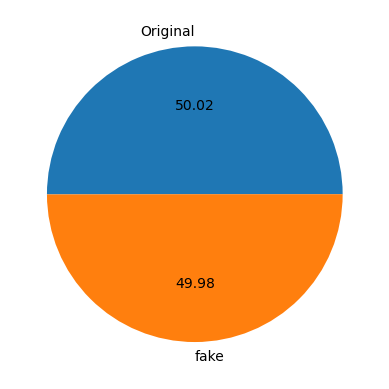

In [20]:
plt.pie(df['target'].value_counts(), labels=['Original', 'fake'],autopct="%0.2f")
plt.show()

In [21]:
import nltk
nltk.download('punkt')
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
df.head()

,text,target,num_characters,num_words,num_sentences
0,These are pretty nice sheets. They are lightw...,0,380,77,6
1,My dog loves this and the price was perfect. ...,1,83,19,2
2,"A different kind of detective, an investigator...",0,299,65,8
3,I really wanted to like these glasses but coul...,1,279,55,2
4,Everything about this was awesome! I couldn't...,0,1261,304,47


In [23]:
df.describe()

,target,num_characters,num_words,num_sentences
count,40412.000000,40412.000000,40412.000000,40412.000000
mean,0.500223,351.365337,76.691131,5.277071
std,0.500006,369.871842,79.242859,4.915033
min,0.000000,24.000000,2.000000,1.000000
25%,0.000000,107.000000,24.000000,2.000000
50%,1.000000,198.000000,44.000000,3.000000
75%,1.000000,439.000000,96.000000,6.000000
max,1.000000,2827.000000,510.000000,133.000000


<Axes: >

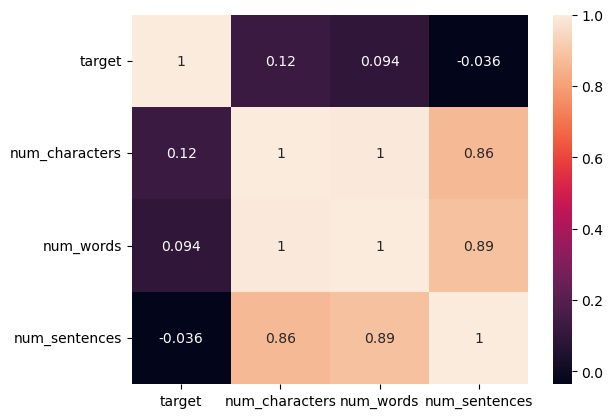

In [25]:
df_numeric = df.select_dtypes(include = 'number')
sns.heatmap(df_numeric.corr(),annot=True)

In [26]:
ps = PorterStemmer()

In [27]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [28]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [29]:
df['transformed_text'] = df['text'].apply(transform_text)

In [30]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,These are pretty nice sheets. They are lightw...,0,380,77,6,pretti nice sheet lightweight comfort also lik...
1,My dog loves this and the price was perfect. ...,1,83,19,2,dog love price perfect appear healthi food
2,"A different kind of detective, an investigator...",0,299,65,8,differ kind detect investig sens mysteri movi ...
3,I really wanted to like these glasses but coul...,1,279,55,2,realli want like glass could keep head long en...
4,Everything about this was awesome! I couldn't...,0,1261,304,47,everyth awesom could put want go bed want put ...


In [33]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [34]:
print(X.shape)
print(y.shape)

(40412, 3000)
(40412,)


In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [36]:
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [37]:
clfs = {
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'xgb':xgb
}

In [38]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    
    return accuracy,precision

In [39]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [40]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [41]:
performance_df.reset_index(drop = True)

,Algorithm,Accuracy,Precision
0,LR,0.847705,0.847743
1,NB,0.832735,0.833123
2,RF,0.828034,0.828774
3,xgb,0.807745,0.809393
4,AdaBoost,0.679822,0.680599
5,DT,0.580478,0.631723
6,KN,0.505753,0.538984


In [42]:
mnb = MultinomialNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [43]:
voting = VotingClassifier(estimators=[('LR', lrc), ('nb', mnb), ('RF', rfc)],voting='soft')

In [44]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('nb', MultinomialNB()),
                             ('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [45]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.8594581219844117
Precision 0.8641290647844719


In [46]:
estimators = [('LR', lrc), ('nb', mnb), ('RF', rfc)]
final_estimator = RandomForestClassifier(n_estimators=50, random_state=2)

In [47]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [48]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.8512928368180132
Precision 0.8462104488594555


In [49]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))